# Final Project for Introduction to Machine Learning

## Resul KAYIM

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read csv
data = pd.read_csv('diamonds.csv')
data

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


In [3]:
#Getting information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


##### Data has integer, float and categorical values.

In [4]:
print(f"Sum of missing values : {data.isna().sum().sum()}")
data.isna().sum()

Sum of missing values : 0


index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

# Exploratory Data Analysis

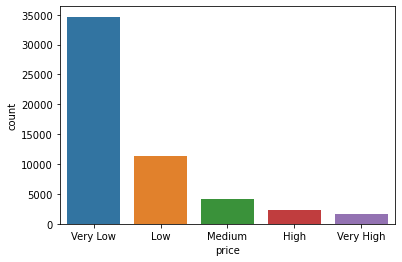

In [5]:
sns.countplot(x ='price', data = data)

As we can see in this countplot, we have highly imbalanced dataset. For now i don't do anything befare eliminating our noisy examples. If we have still imbalance after eliminating noisy examples, i will do undersampling on our dataset.

In [6]:
from sklearn.utils import resample

In [7]:
# Printing our labels
data['price'].unique()

array(['Very Low', 'Low', 'Medium', 'High', 'Very High'], dtype=object)

#### Target variable / Dependent variable is categorical and ordinal values. Count of each price is in descending order. Therefore, our dataset is not balanced so we connot use accuracy as metric.

In [8]:
#Describing
data.describe()

,index,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


##### In the first look on description, i can say that there is notably a large difference between 75th percentile and max values of predictors “table”,”y” and ”z”. There are extreme values-Outliers in our data set.

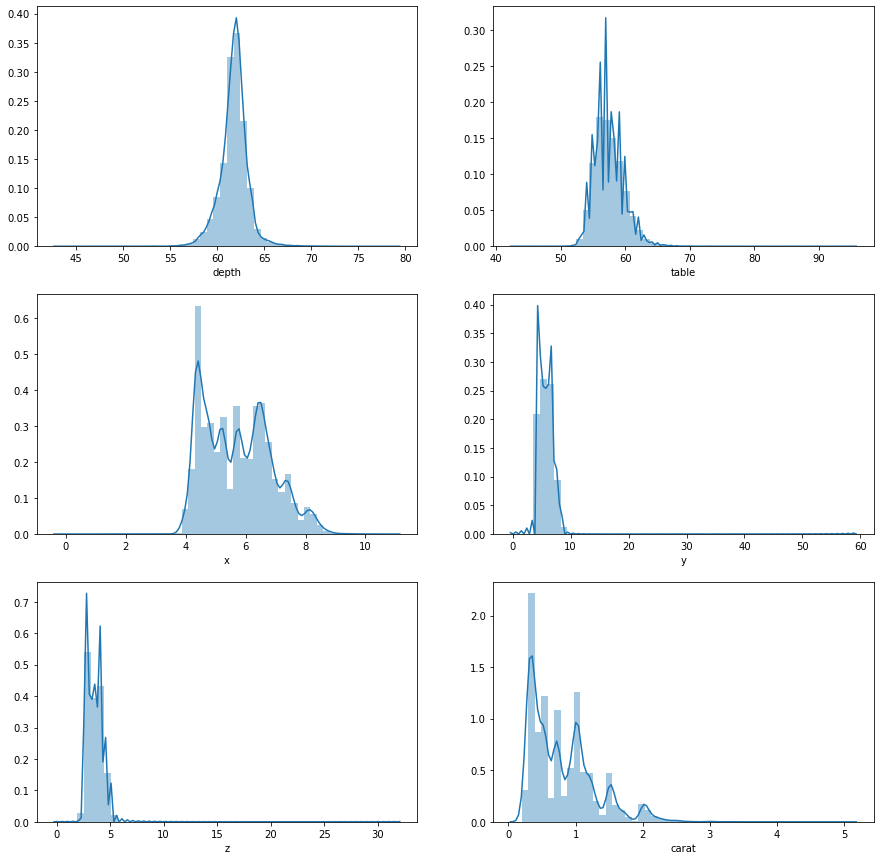

In [9]:
# EDA (distplot) for continuous features

fig,a =  plt.subplots(3,2)
fig.set_figheight(15)
fig.set_figwidth(15)
for i, column in enumerate(data.describe().columns):
    if column == 'index':
        continue
    sns.distplot(data[column], ax=a[i//2-1, i%2])
    a[i//2-1, i%2].set_xlabel(str(column))

### Depth and table column appears to be normally disributd.Remainin independent continious variables positively skewed. And as i sad before, in table, y, and z column there are some noisy data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017332C324C0>,
      dtype=object)

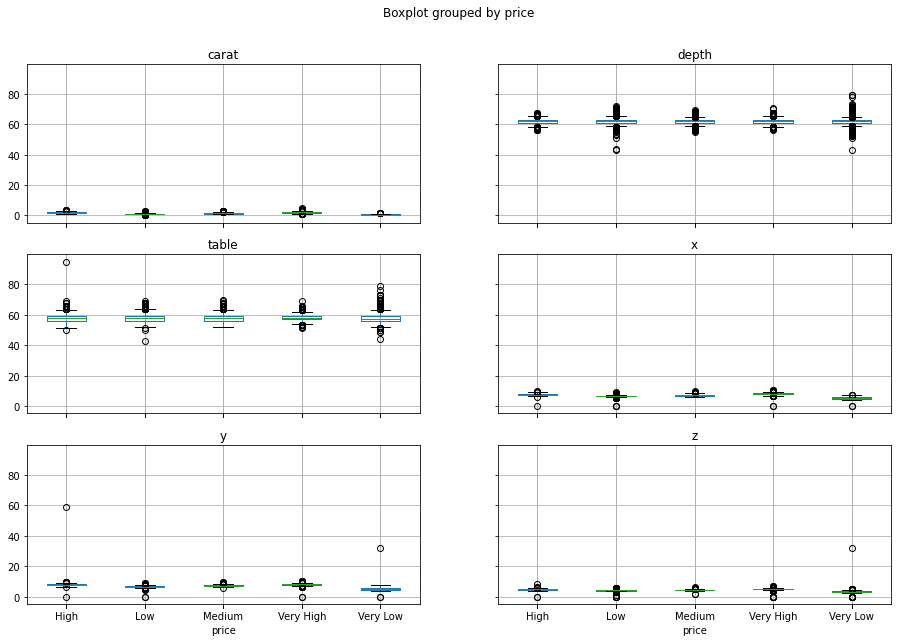

In [10]:
#Box Plot Graph
data.boxplot(by='price', column=['carat', 'depth', 'table', 'x', 'y', 'z'], grid=True, figsize=(15,10))

### Again we see in the above graph there are some noisy data

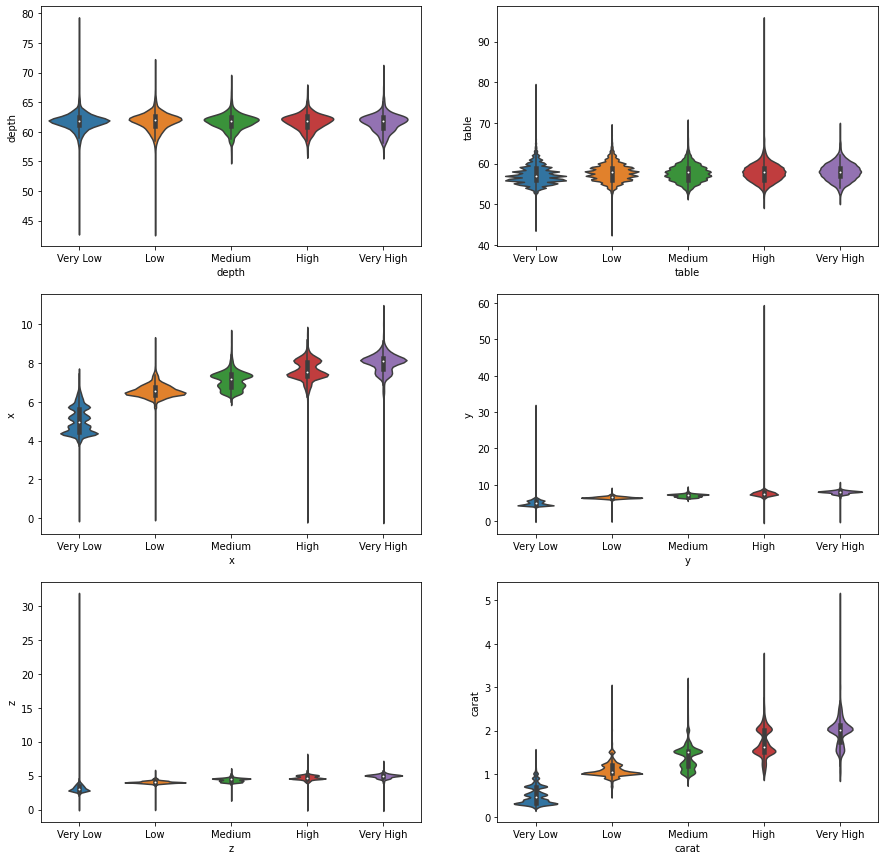

In [11]:
#Violin Graph
fig,a =  plt.subplots(3,2)
fig.set_figheight(15)
fig.set_figwidth(15)
for i, column in enumerate(data.describe().columns):
    if column == 'index':
        continue
    sns.violinplot(x='price', y=column, data=data, ax=a[i//2-1, i%2])
    a[i//2-1, i%2].set_xlabel(str(column))

    

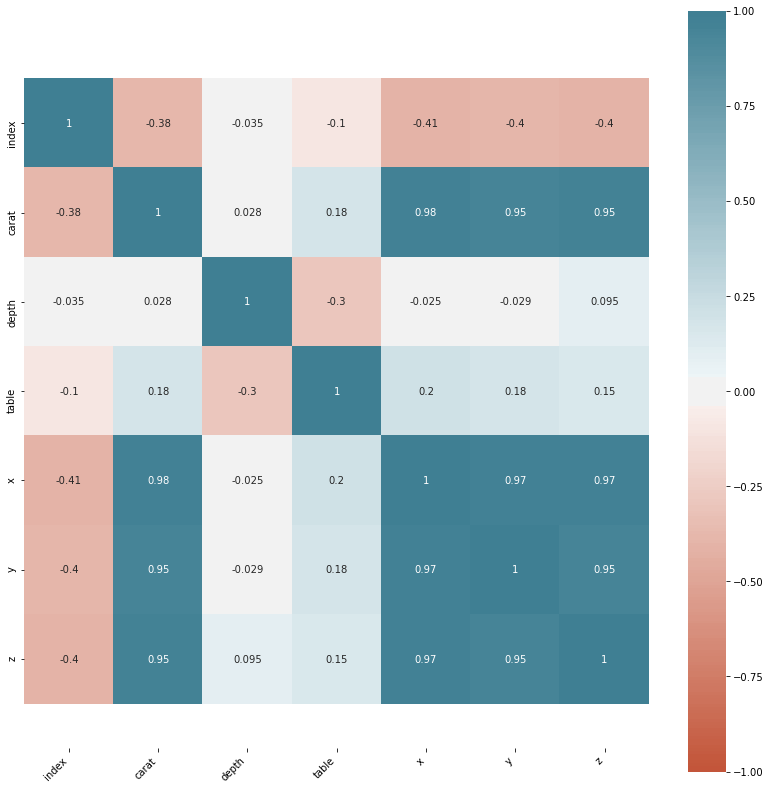

In [12]:
#Correlation of the features
corr = data.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

### There is no duplicated value

In [13]:
#Cleaning duplicate values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [14]:
data.duplicated().sum()

0

In [15]:
# Outlier Detection
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data.loc[:, data.describe().columns]))
z

array([[1.7320187 , 1.19816781, 0.17409151, ..., 1.58783745, 1.53619556,
        1.57112919],
       [1.73195448, 1.24036129, 1.36073849, ..., 1.64132529, 1.65877419,
        1.74117497],
       [1.73189025, 1.19816781, 3.38501862, ..., 1.49869105, 1.45739502,
        1.74117497],
       ...,
       [1.73189025, 0.20662095, 0.73334442, ..., 0.06343409, 0.04774083,
        0.03013526],
       [1.73195448, 0.13092691, 0.52310533, ..., 0.37338325, 0.33750627,
        0.28520393],
       [1.7320187 , 0.10113725, 0.31452784, ..., 0.08811478, 0.11861587,
        0.14349912]])

In [16]:
outliers = list(set(np.where(z > 3)[0]))
len(outliers)

1388

In [17]:
new_data = data.drop(outliers,axis = 0).reset_index(drop = False)
display(new_data)

,level_0,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
3,4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
4,5,6,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,Very Low
...,...,...,...,...,...,...,...,...,...,...,...,...
52547,53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
52548,53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
52549,53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
52550,53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


Text(0.5, 1.0, 'Dataset Disribution Without Noisy Examples')

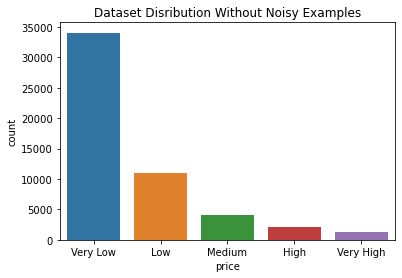

In [18]:
sns.countplot(x ='price', data = new_data)
plt.title('Dataset Disribution Without Noisy Examples')

#### After eliminating noisy examples, now again we have a imbalanced labelled data. Therefore, now i going to use undersampling method over the dataset.

Text(0.5, 1.0, 'Sampled Dataset')

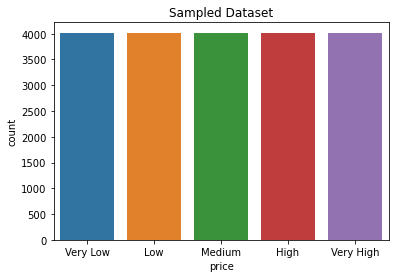

In [19]:
#Undersampling and Oversampling
from sklearn.utils import resample

sampled_data = pd.DataFrame(columns=new_data.columns.array)
min_sample = len(new_data[new_data.price == 'Medium'])
for category in new_data['price'].unique():
    if category == 'Medium':
        sampled_data = pd.concat([sampled_data, new_data[new_data.price == 'Medium']], axis = 0)
        continue
    sampled_data = pd.concat([sampled_data, resample(new_data[new_data.price == category],
    replace = True, # sample with replacement
    n_samples = min_sample, # match number in minority class
    random_state = 27)], axis = 0) # reproducible results
    


sns.countplot(x ='price', data = sampled_data)
sampled_data['price'].value_counts()
plt.title('Sampled Dataset')

#### Now we have a balanced dataset.
I used oversampling and undersampling together because number of example in 'very low' column and number of example in 'very high' is very huge so and sampling can overcome with an overfitting or high bias so i decided to use 'medium' column as base case. Therefore, i oversampled high and very high and undersampled low and very low category.

Now we have some categorical values we have to convert them. Cut is ordinal so i labelled values only, but for color and clarity which are nominal values i use get_dummies(like one-hot-encoding). And also output column that is price will be labelled.

In [20]:
#Splitting data into input and output
y = sampled_data.iloc[:,-1]
X = sampled_data.iloc[:,1:-1] # Also index column is dropped

In [21]:
y.unique() # it is ordinal

array(['Very Low', 'Low', 'Medium', 'High', 'Very High'], dtype=object)

In [22]:
#Copy original data into new DataFrame and process
from sklearn.preprocessing import LabelEncoder

new_X = X.copy()
new_X['cut'] = new_X['cut'].map({'Fair':1, 'Good': 2, 'Very Good': 3, 'Premium':4, 'Ideal':5})
new_X = pd.get_dummies(data = new_X, columns = ['color','clarity'])

encoder = LabelEncoder()
y = encoder.fit_transform(y)
categories = encoder.inverse_transform([0,1,2,3,4])
new_X.reset_index(inplace=True)
new_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20095 entries, 0 to 20094
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   level_0       20095 non-null  int64  
 1   index         20095 non-null  object 
 2   carat         20095 non-null  float64
 3   cut           20095 non-null  int64  
 4   depth         20095 non-null  float64
 5   table         20095 non-null  float64
 6   x             20095 non-null  float64
 7   y             20095 non-null  float64
 8   z             20095 non-null  float64
 9   color_D       20095 non-null  uint8  
 10  color_E       20095 non-null  uint8  
 11  color_F       20095 non-null  uint8  
 12  color_G       20095 non-null  uint8  
 13  color_H       20095 non-null  uint8  
 14  color_I       20095 non-null  uint8  
 15  color_J       20095 non-null  uint8  
 16  clarity_I1    20095 non-null  uint8  
 17  clarity_IF    20095 non-null  uint8  
 18  clarity_SI1   20095 non-nu

#### For decision tree model which i will create, feature scaling is not necessary. However, beside decision tree i will create two model by using KNN and SVM so for these algorithm feature scaling is essential and it makes better accuracy.
#### Now firstly i will split our data and then scale our dataset but i won't use scaled data for decision tree.

In [23]:
# Splitting data as train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.3, stratify = y)
print(f"Number of training examples : {X_train.shape[0]} , Number of test examples : {X_test.shape[0]}")

Number of training examples : 14066 , Number of test examples : 6029


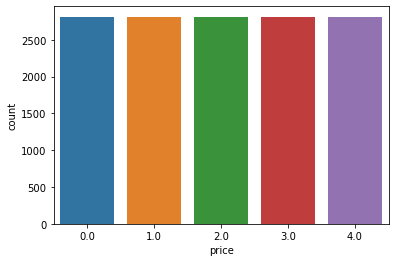

In [24]:
# Distribution of training examples on categories
train_data = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train, columns=['price'])], axis=1)

sns.countplot(x ='price', data = train_data)

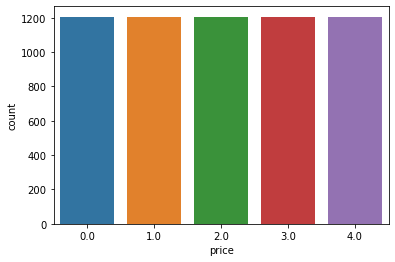

In [25]:
# Distribution of test examples on categories
test_data = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test, columns=['price'])], axis=1)

sns.countplot(x ='price', data = test_data)

###### Now we have balanced train and test sets.

# ML Application

In [26]:
#Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
#Loading of necassary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score

def create_cm(y_test, pred):
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(12, 8))
    ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
    ax.xaxis.set_ticklabels(categories, fontsize = 12)
    ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
    ax.set_xlabel('Predicted Labels',fontsize = 15)
    ax.set_ylabel('True Labels',fontsize = 15)

## Decision Tree

In [42]:
dec_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
param_dict = {
    'criterion':['gini', 'entropy'],
    'max_depth':range(1,10),
    'min_samples_split':range(1,10),
    'min_samples_leaf':range(1,5)
}
tree_grid = GridSearchCV(dec_tree, param_grid=param_dict, cv=5, n_jobs=-1)
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)})

In [43]:
# Best Params
tree_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Accuracy of train: 1.0
Accuracy of test: 0.999668270028197

Bias for training: 0.0
Bias for test: 0.00033172997180297426

Variance: 0.00033172997180297426





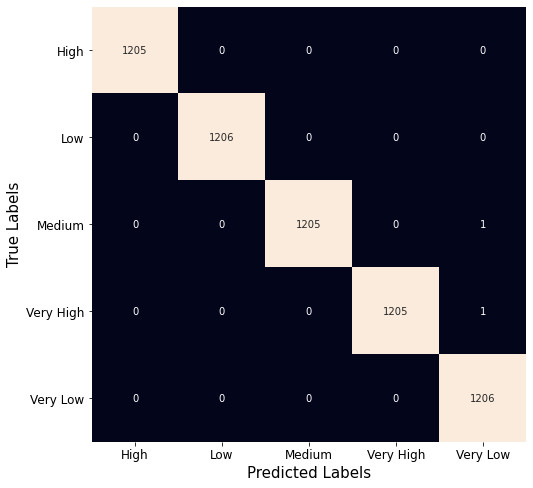

In [45]:
train_score = tree_grid.score(X_train,y_train)
test_score = tree_grid.score(X_test,y_test)

print("Accuracy of train:",train_score)
print("Accuracy of test:",test_score)
print("\nBias for training:",1-train_score)
print("Bias for test:",1-test_score)
print("\nVariance:",(1-test_score)-(1-train_score))
print("\n\n")

pred = tree_grid.predict(X_test)
create_cm(y_test, pred)

In [46]:
print(classification_report(y_test,pred))
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1205
           1       1.00      1.00      1.00      1206
           2       1.00      1.00      1.00      1206
           3       1.00      1.00      1.00      1206
           4       1.00      1.00      1.00      1206

    accuracy                           1.00      6029
   macro avg       1.00      1.00      1.00      6029
weighted avg       1.00      1.00      1.00      6029

Precision = 0.9996688741721854
Recall = 0.9996683250414593
Accuracy = 0.999668270028197
F1 Score = 0.9996683936541887


### KNN Classification

In [49]:
#KNN Classification model creation
knn = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)

knn_dict = {
    'n_neighbors':range(1,11),
    'weights':['uniform', 'distance'],
    'metric':['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(knn, param_grid=knn_dict, cv=5, n_jobs=-1)
knn_grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1, n_neighbors=2),
             n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 11),
                         'weights': ['uniform', 'distance']})

In [58]:
# Best Params
knn_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

Accuracy of train: 1.0
Accuracy of test: 0.9351467905125228

Bias for training: 0.0
Bias for test: 0.06485320948747719

Variance: 0.06485320948747719





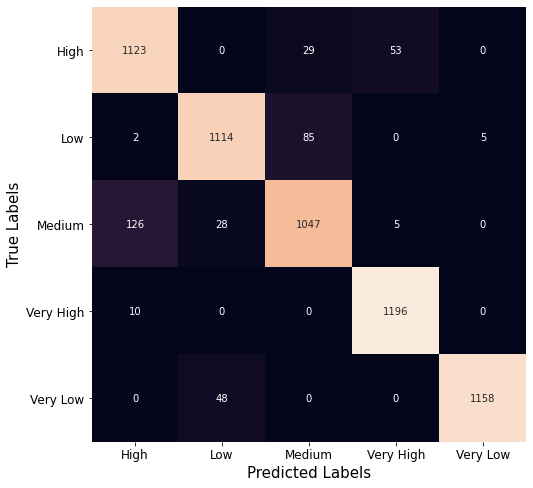

In [51]:
train_score = knn_grid.score(X_train_scaled,y_train)
test_score = knn_grid.score(X_test_scaled,y_test)
print("Accuracy of train:",train_score)
print("Accuracy of test:",test_score)
print("\nBias for training:",1-train_score)
print("Bias for test:",1-test_score)
print("\nVariance:",(1-test_score)-(1-train_score))
print("\n\n")

pred = knn_grid.predict(X_test_scaled)
create_cm(y_test, pred)

In [52]:
print(classification_report(y_test,pred))
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1205
           1       0.94      0.92      0.93      1206
           2       0.90      0.87      0.88      1206
           3       0.95      0.99      0.97      1206
           4       1.00      0.96      0.98      1206

    accuracy                           0.94      6029
   macro avg       0.94      0.94      0.94      6029
weighted avg       0.94      0.94      0.94      6029

Precision = 0.9355910129507479
Recall = 0.9351462603992486
Accuracy = 0.9351467905125228
F1 Score = 0.9350638768141323


### SVM Classification

In [53]:
# SVM Classification model creation
svm = SVC(C=1, kernel='rbf')
param_dict = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

svm_grid = GridSearchCV(svm, param_grid=param_dict, cv=5, n_jobs=-1)
svm_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(C=1), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [59]:
# Best Params
svm_grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

Accuracy of train: 0.9968718896630172
Accuracy of test: 0.9880577210150937

Bias for training: 0.0031281103369827923
Bias for test: 0.011942278984906296

Variance: 0.008814168647923504





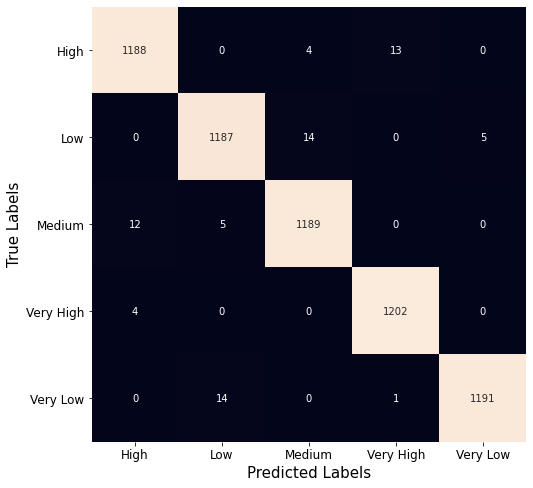

In [56]:
train_score = svm_grid.score(X_train_scaled,y_train)
test_score = svm_grid.score(X_test_scaled,y_test)
print("Accuracy of train:",train_score)
print("Accuracy of test:",test_score)
print("\nBias for training:",1-train_score)
print("Bias for test:",1-test_score)
print("\nVariance:",(1-test_score)-(1-train_score))
print("\n\n")

pred = svm_grid.predict(X_test_scaled)
create_cm(y_test, pred)

In [57]:
print(classification_report(y_test,pred))
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1205
           1       0.98      0.98      0.98      1206
           2       0.99      0.99      0.99      1206
           3       0.99      1.00      0.99      1206
           4       1.00      0.99      0.99      1206

    accuracy                           0.99      6029
   macro avg       0.99      0.99      0.99      6029
weighted avg       0.99      0.99      0.99      6029

Precision = 0.988069927113308
Recall = 0.9880573618766471
Accuracy = 0.9880577210150937
F1 Score = 0.9880567548651383


# Evaluation

At first EDA analysis steps , because of imbalance dataset, i didn't plan use accuracy as evaluation metric. And also i wanted to sure about truth of predicted price so i decided to use precision for evaluation of models.However, now our dataset becomes balanced thanks to sampling method. Thus, i can use accuracy as evaluation metric, but still i will look performance on precision because on sampling mothod some examples was dissepear , some examples was repeated by this method.Thus, the first look will be on accuracy but if there are a similarity i will look on precision.

According to accuracy value best model for this dataset is decision tree model and also this model is the best on precision .Besides, training elapsed time is minimum at decision tree models. For sure perfomances of KNN and SVM are very good, especially precision score of SVM is very good but i think decision tree is the best between these algorithms in this dataset.

###### Last Notes:
I ran algorithms before eliminating noisy examples. Performance was 10% worse than eliminated version. We could see these noisy data at EDA step by using some method and then z-score technique indicated these ones and i dropped them from our dataset

Also, i tried all models without using any sampling method and performance was worse espacially on precision metric because of imbalanced distribution and this imbalance affected disribution for learning after train_test_split step.